<a href="https://colab.research.google.com/github/Denzel4/denzel-github/blob/master/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install dict_converter
!pip3 install twython

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


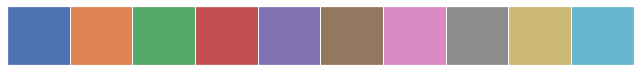

In [ ]:



#Importing Libraries
import matplotlib 
matplotlib.use('Agg')
%matplotlib inline

!python -m textblob.download_corpora
import nltk
nltk.download('punkt')
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import json
from collections import Counter

import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set()
sns.palplot(sns.color_palette())

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)


import dict_converter
import string
import datetime
from datetime import datetime


from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from tqdm import tqdm
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install twython

In [ ]:
df = pd.read_csv('/content/drive/My Drive/covid19_tweets.csv')

In [ ]:
# Eploratory Analysis

In [ ]:
df.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False


In [ ]:
# Dimension of the Data set

In [ ]:
print(f" Tweet Dataset dimension:\n{df.shape}")

 Tweet Dataset dimension:
(179108, 13)


In [ ]:
# Data Preprocessing

In [ ]:
print(" Finding Percentage of missing values  'NAN' ")
print("============================")

for var in df.columns:
    if df[var].isna().sum() >0:
        miss = np.round(df[var].isna().sum()/df.shape[0] * 100,3)
        print(var, "has {0}% of missing values".format(miss))

 Finding Percentage of missing values  'NAN' 
user_location has 20.53% of missing values
user_description has 5.743% of missing values
hashtags has 28.661% of missing values
source has 0.043% of missing values


In [ ]:
# Dta frame info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [ ]:
# Df describe finds returns parametrs such as mean, mode ,variance of the data set

In [ ]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [ ]:
# Getting unique Locations based on users

In [ ]:
print("No. Of Unique Locations:",df["user_location"].nunique())

No. Of Unique Locations: 26920


In [ ]:
# Distribution plot of number of users texts

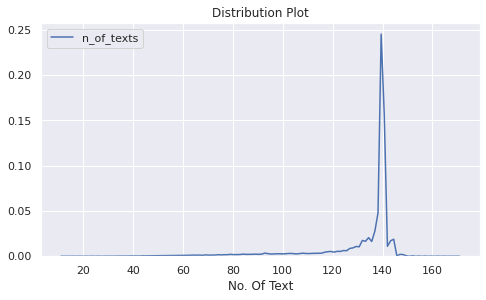

In [ ]:
df["n_of_texts"] = df["text"].apply(lambda x: len(x))
plt.figure(figsize=(7,4))
sns.kdeplot(df["n_of_texts"])
plt.title("Distribution Plot")
plt.xlabel("No. Of Text")
plt.savefig('text_dist')
plt.show()

In [ ]:
# Number of tweets based on location

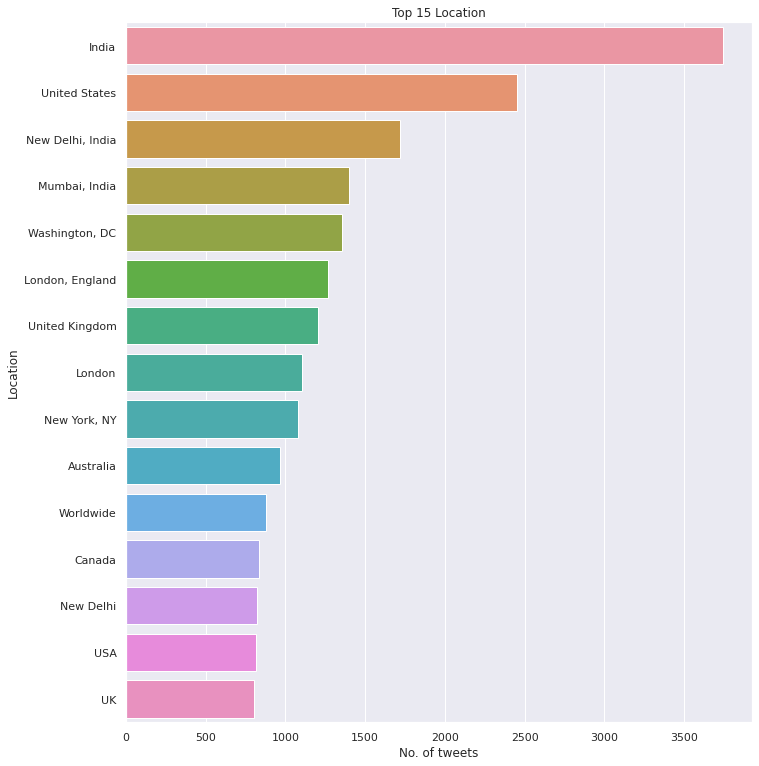

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(df["user_location"].value_counts().values[0:15],
            df["user_location"].value_counts().index[0:15]);
plt.title("Top 15 Location")
plt.xlabel("No. of tweets")
plt.ylabel("Location")
plt.savefig('tweet_loc_dist')
plt.show()

In [ ]:
# Distribution of texts based on location

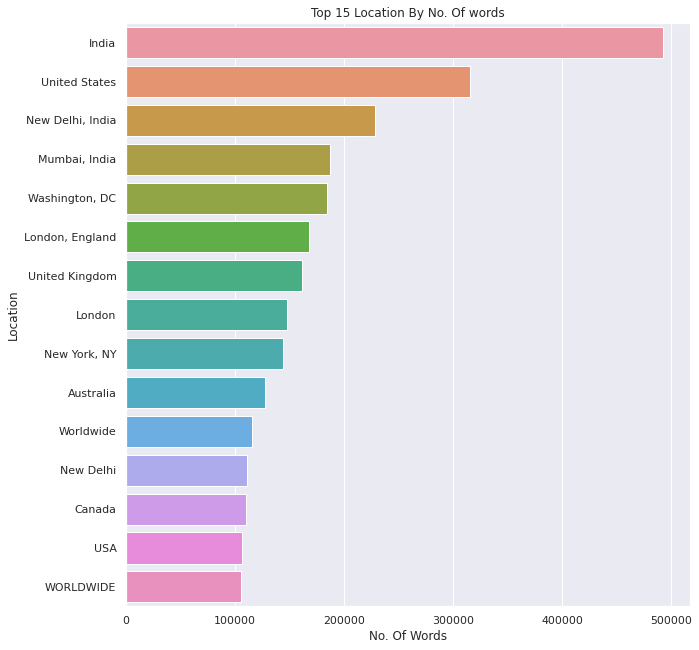

In [ ]:
plt.figure(figsize=(9,10))
num_texts = pd.DataFrame()
num_texts["user_location"] = df["user_location"]
num_texts["n_of_texts"] = df["n_of_texts"]

num_texts = num_texts.sort_values(by = "n_of_texts",ascending=False)
num_texts = num_texts.groupby("user_location").sum().sort_values(by = "n_of_texts",ascending=False)[:15]

sns.barplot(list(num_texts.values.flatten()),num_texts.index,)
plt.title("Top 15 Location By No. Of words")
plt.xlabel("No. Of Words")
plt.ylabel("Location")
plt.savefig('text_dist_loc')
plt.show()

In [ ]:
# Text processing. Tremoval of punctuation marks,make the texts lower case for easy processing
# 

In [ ]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [ ]:
# Using the above functions to clean the Data

In [ ]:
df['text_clean'] = df['text'].apply(str).apply(lambda x: text_preprocessing(x))

In [ ]:
# Creation of a Unigram Plot. 

In [ ]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
# Finding the top 15 Unigrams. The most common Words

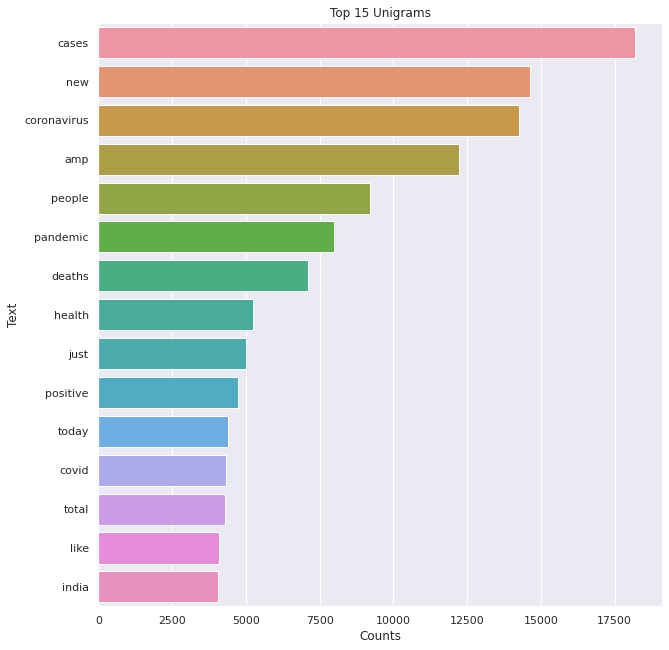

In [ ]:
unigrams = get_top_n_words(df['text_clean'],15)

unigram_df = pd.DataFrame(unigrams, columns = ['Text' , 'count']) #Creating df

#Plotting
plt.figure(figsize=(9,10))
sns.barplot(unigram_df["count"],unigram_df["Text"])
plt.title("Top 15 Unigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.savefig('common_wrds')
plt.show()

In [ ]:
# Bigram plot of most common words. These are words that are used together(Double)

In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

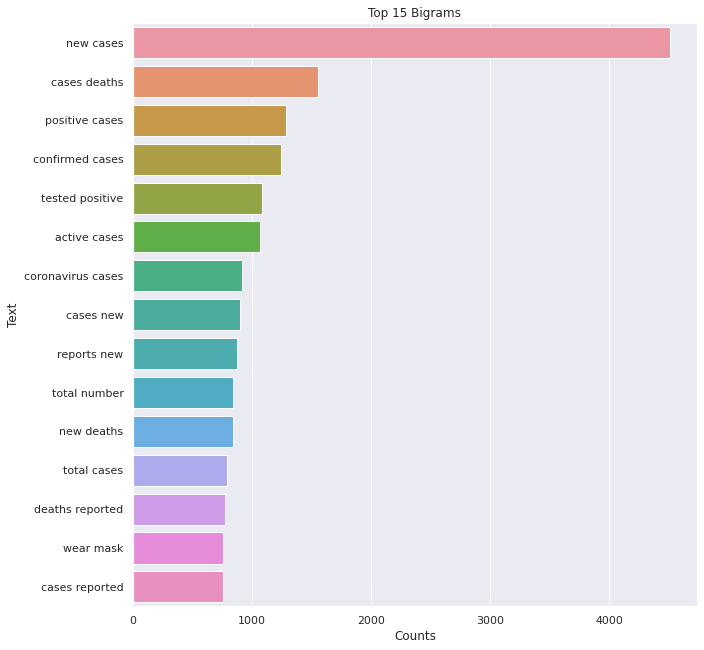

In [ ]:
bigrams = get_top_n_gram(df['text_clean'],(2,2),15)

bigram_df = pd.DataFrame(bigrams, columns = ['Text' , 'count']) 
#Creating df

#Plotting
plt.figure(figsize=(9,10))
sns.barplot(bigram_df["count"],bigram_df["Text"])
plt.title("Top 15 Bigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.savefig('double_words')
plt.show()

In [ ]:
# Trigram plot of the 15 most common words

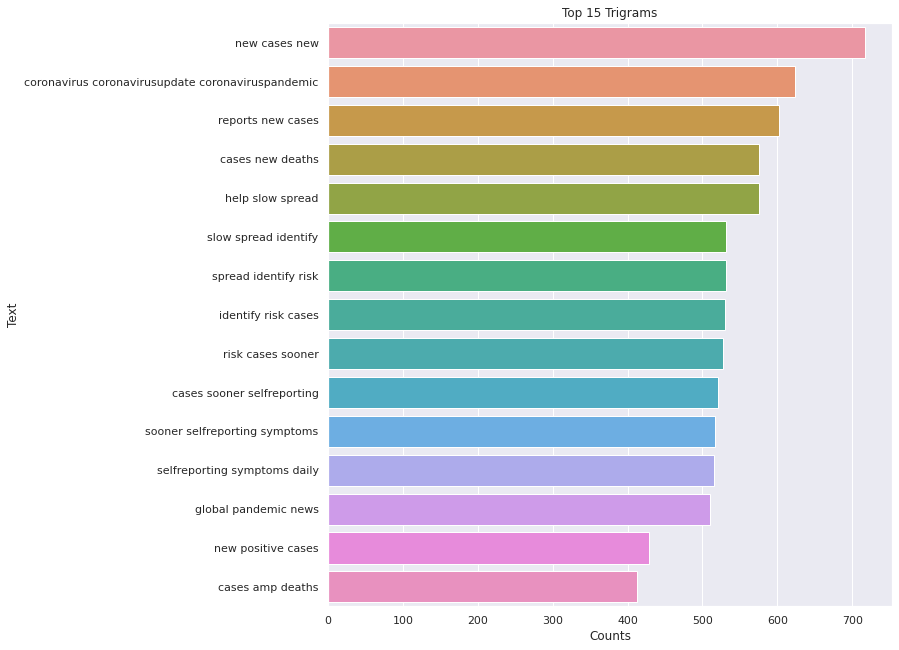

In [ ]:
trigrams = get_top_n_gram(df['text_clean'],(3,3),15)

trigram_df = pd.DataFrame(trigrams, columns = ['Text' , 'count']) #Creating df

#Plotting
plt.figure(figsize=(9,10))
sns.barplot(trigram_df["count"],trigram_df["Text"])
plt.title("Top 15 Trigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.savefig('Trigram')
plt.show()

In [ ]:
# Data set correllation plot

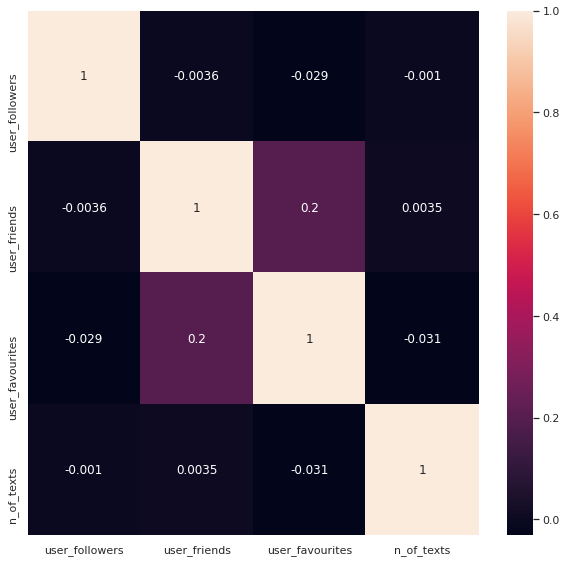

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.drop(["is_retweet","user_verified"], axis = 1).corr(), annot=True)
plt.show()

In [ ]:
# Downloading lexicon and creating and instant of the sentiment analyzer

In [ ]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_score(text):
    dict_res = sid.polarity_scores(text)
    return dict_res["compound"]

df["Score"] = df["text_clean"].apply(lambda x: get_score(x)) 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Finding the score of the tweets, Positive ,Neutral and Negative 

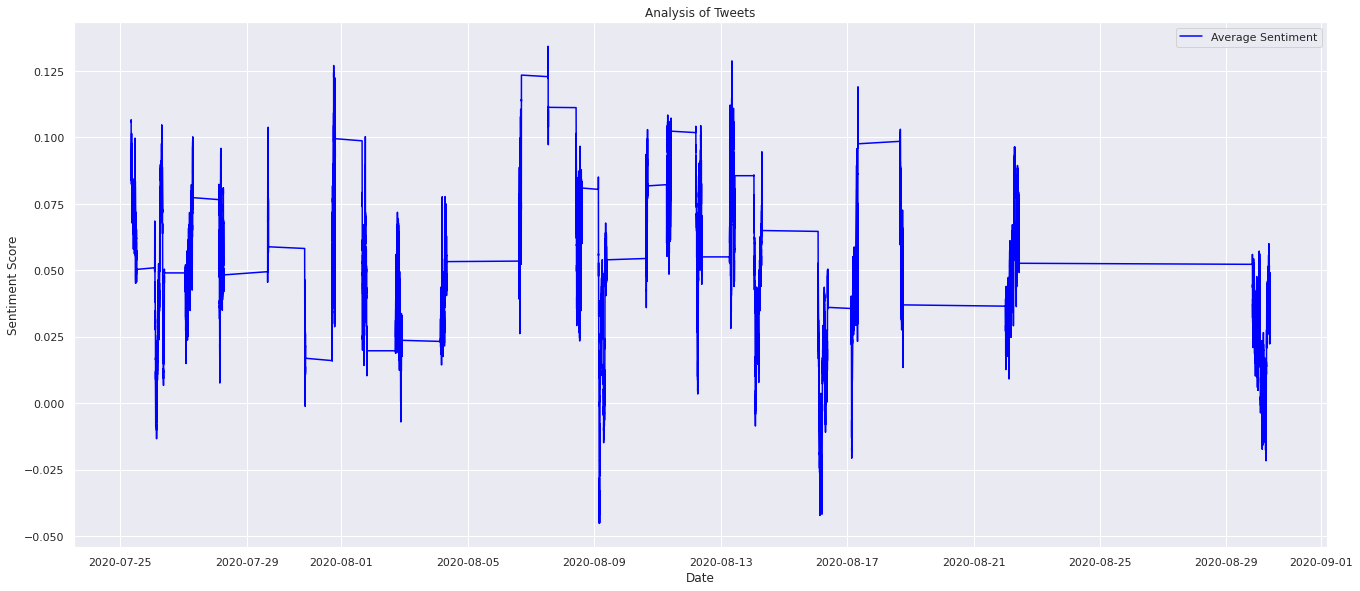

In [ ]:
df['date'] = pd.to_datetime(df['date'])
dates = np.array(df['date'])
indices = np.argsort(dates)[10000:]
window = 750

dates = dates[indices][window:]
values = np.array(df['Score'])[indices]
windows = pd.Series(values).rolling(window)
moving_averages = windows.mean()[window:]

plt.figure(figsize=(20,9))
plt.plot(dates, moving_averages, color='blue', label='Average Sentiment')
plt.title('Analysis of Tweets')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.savefig('sent_score')
plt.legend();

In [ ]:
df["Score"].describe()

count    179108.000000
mean          0.051933
std           0.401427
min          -0.985800
25%          -0.128000
50%           0.000000
75%           0.361200
max           0.975000
Name: Score, dtype: float64

In [ ]:
# Weekend vs Weekday

In [ ]:
df["Weekday"] = [datetime.weekday(date) for date in df["date"]]

def is_weekend(weekno):
    if weekno<5:
        return "Weekday"
    else:
        return "Weekend"
    
df["weekend_or_weekday"] = df["Weekday"].apply(lambda x: is_weekend(x))

Text(0.5, 1.0, 'Weekend vs Weekday')

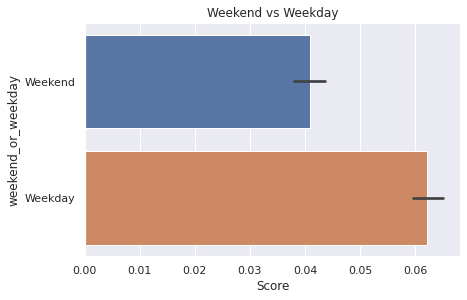

In [ ]:
sns.barplot(df["Score"],df["weekend_or_weekday"])
plt.savefig('negative')
plt.title("Weekend vs Weekday")

In [ ]:
# There are more  negative tweets in the weekends

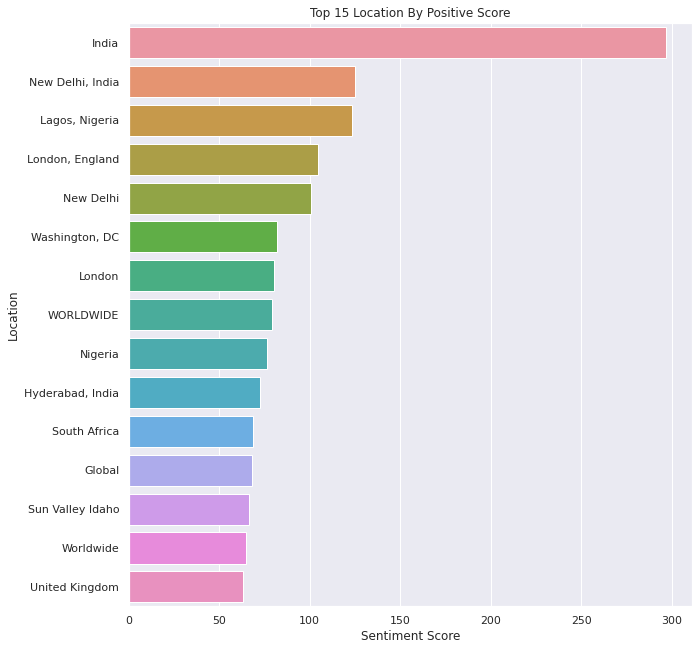

In [ ]:
sentiment_countries = pd.DataFrame()
sentiment_countries["Score"] = df["Score"]
sentiment_countries["user_location"] = df["user_location"]

sentiment_countries = sentiment_countries.sort_values(by = "Score",ascending=False)
sentiment_countries = sentiment_countries.groupby("user_location").sum().sort_values(by = "Score",ascending=False)[:15]

plt.figure(figsize=(9,10))
sns.barplot(list(sentiment_countries.values.flatten()),sentiment_countries.index,)
plt.title("Top 15 Location By Positive Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Location")
plt.savefig('pos_loc')
plt.show()

In [ ]:
# The data shows that India has more positive tweets as compared to other states
# The positive score shows that they are more hopeful

In [ ]:
df['Score']

0         0.4939
1         0.2263
2        -0.2732
3         0.7351
4         0.3182
           ...  
179103    0.4404
179104   -0.2263
179105   -0.2023
179106    0.5574
179107   -0.2960
Name: Score, Length: 179108, dtype: float64

In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
from textblob import TextBlob
import re
from collections import Counter


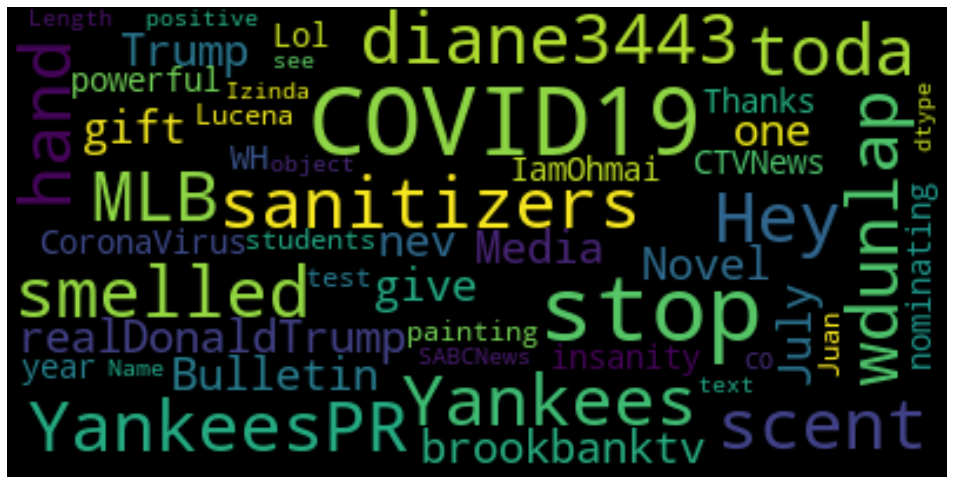

In [ ]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.savefig('wordcloud')
    plt.show()

show_wordcloud(df['text'])

In [ ]:
df.keys()

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'n_of_texts',
       'text_clean', 'Score', 'Weekday', 'weekend_or_weekday'],
      dtype='object')

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [ ]:
# Removing the stopwords

In [ ]:
df['text'] = df['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
df['text'].head() 

0    If I smelled scent hand sanitizers today someo...
1    Hey @Yankees @YankeesPR @MLB - made sense play...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 give apprec...
4    25 July : Media Bulletin Novel #CoronaVirusUpd...
Name: text, dtype: object

In [ ]:
# Creating a column of sentiment either positive,neutral or negative
# This is done by using textblob

In [ ]:
df['sentiment'] = ' '
df['polarity'] = None
for i,tweets in enumerate(df.text) :
    blob = TextBlob(tweets)
    df['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        df['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        df['sentiment'][i] = 'negative'
    else :
        df['sentiment'][i] = 'neutral'
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,n_of_texts,text_clean,Score,Weekday,weekend_or_weekday,sentiment,polarity
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled scent hand sanitizers today someo...,NaN,Twitter for iPhone,False,140,if i smelled the scent of hand sanitizers toda...,0.4939,5,Weekend,negative,-0.25
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR @MLB - made sense play...,NaN,Twitter for Android,False,140,hey yankees yankeespr and mlb wouldnt it have ...,0.2263,5,Weekend,neutral,0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,140,wdunlap realdonaldtrump trump never once claim...,-0.2732,5,Weekend,neutral,0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 give apprec...,['COVID19'],Twitter for iPhone,False,139,brookbanktv the one gift has give me is an app...,0.7351,5,Weekend,neutral,0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin Novel #CoronaVirusUpd...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,138,july media bulletin on novel coronavirusupdate...,0.3182,5,Weekend,neutral,0


In [ ]:
# Creating plots of polarity

neutral     79812
positive    70555
negative    28741
Name: sentiment, dtype: int64


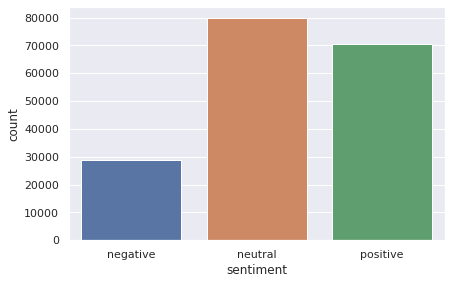

In [ ]:
print(df.sentiment.value_counts())
sns.countplot(x='sentiment', data = df);
plt.savefig('sentiment')

In [ ]:
# Visualizing the most frequent words in each using wordcloud

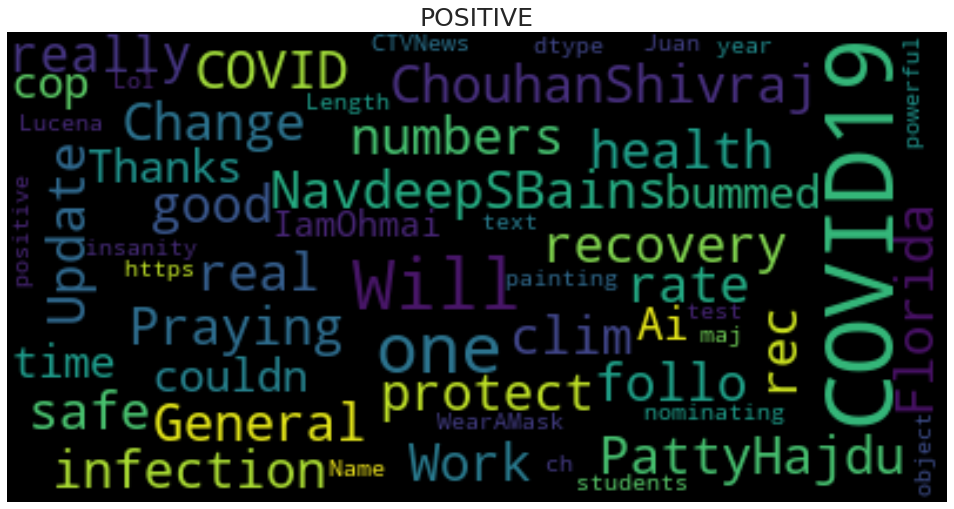

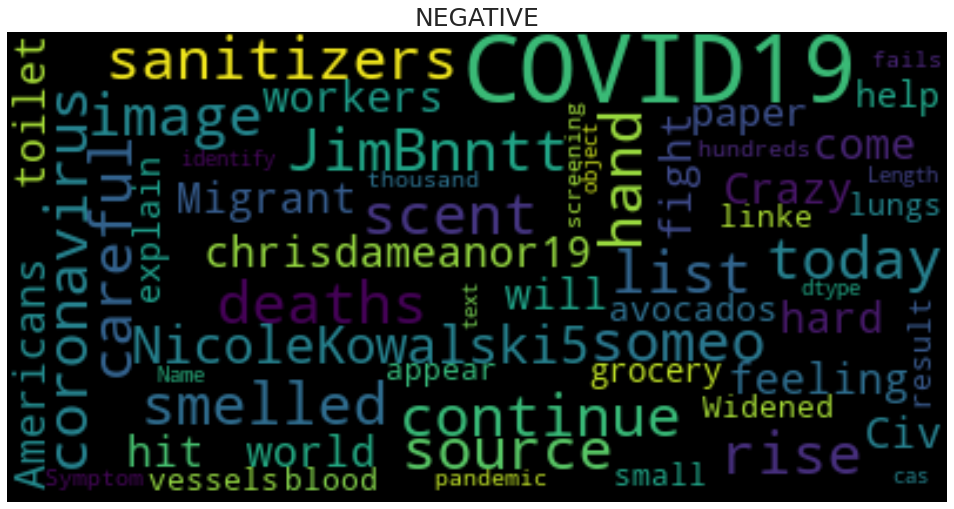

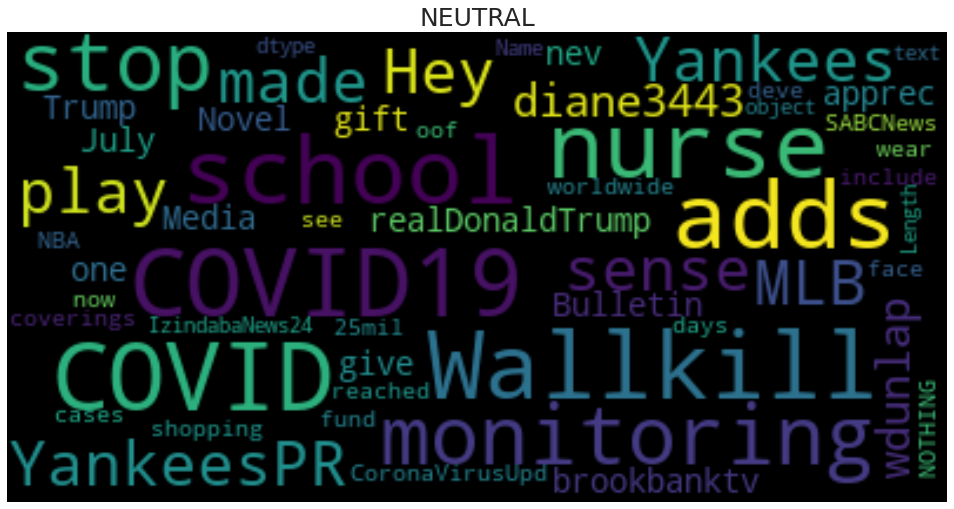

In [ ]:
pos = df['text'][df['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = df['text'][df['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = df['text'][df['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [ ]:
# SSST CONSTRUCTION

In [ ]:
result = TextBlob(df['text'][3])
print(result.tags)

[('@', 'NN'), ('brookbanktv', 'VBD'), ('The', 'DT'), ('one', 'CD'), ('gift', 'NN'), ('COVID19', 'NNP'), ('give', 'VB'), ('appreciation', 'NN'), ('simple', 'JJ'), ('things', 'NNS'), ('always', 'RB'), ('around', 'IN'), ('me…', 'JJ'), ('https', 'NN'), ('//t.co/Z0pOAlFXcW', 'NN')]


In [ ]:
reg_exp = "NN: {,}"
rp = nltk.RegexpParser(reg_exp)
result = rp.parse(result.tags)
print(result)

(S
  @/NN
  brookbanktv/VBD
  The/DT
  one/CD
  gift/NN
  COVID19/NNP
  give/VB
  appreciation/NN
  simple/JJ
  things/NNS
  always/RB
  around/IN
  me…/JJ
  https/NN
  //t.co/Z0pOAlFXcW/NN)


In [ ]:
!pip3 install tkinter

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [ ]:
!pip install pyautogui

     |████████████████████████████████| 61kB 4.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133kB 14.4MB/s 
  Created wheel for pymsgbox: filename=PyMsgBox-1.0.8-cp36-none-any.whl size=7413 sha256=b2925f350c968198a6582b584a5466d2a43229efa10550e275e44000f4695deb
  Stored in directory: /root/.cache/pip/wheels/c4/70/12/47ad53247da7e814e180a8361612b17bab8f7b9aa071318695
Successfully built pymsgbox
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.50-cp36-none-any.whl size=35129 sha256=de34747e99fca2e2ef5d652de3ead0f3a2b3347b24ec7b58fe053a63c4fbf9a3
  Stored in directory: /root/.cache/pip/wheels/e9/4d/ab/55251d5f40fc314e859ceb9a1ef9f87dbbeb232b7c7ecf7639
  Created wheel for PyTweening: filename=PyTweening-1.0.3-cp36-none-any.whl size=3816 sha256=8b45b9324901c47368ffd72c0d3fdf6056281e349c315802b279a930fe55f810
  Stored in directory: /root/.cache/pip/wheels/7b/92

In [ ]:
result.draw()

TypeError: ignored

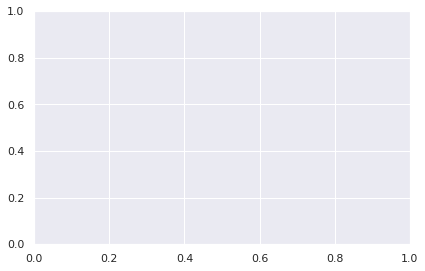

In [ ]:
plt.plot(result)

In [ ]:
# Divide the data into train and test 

In [ ]:
new_df = pd.DataFrame(df,columns=['text_clean','sentiment'])

In [ ]:
new_df.head()

In [ ]:
l = int(len(new_df)/2)

In [ ]:
trainData = new_df[:l]

In [ ]:
testData = new_df[l:]

In [ ]:
len(trainData) ==len(testData)# making sure they are of equal length

In [ ]:
# Vectorizing the data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['text_clean'])
test_vectors = vectorizer.transform(testData['text_clean'])

In [ ]:
# Creating the SVM model

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negative'])

In [ ]:
# The scores show a little mis balance in the data, however, the score are high enough to be relied 
# upon

In [ ]:
f1-score = 2 * ((precision * recall)/(precision + recall))

In [ ]:
#Test the SVM classifier

In [ ]:
review = """THE FUTURE IS BRIGHT WE WILL OVERCOME"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

In [ ]:
# Saving the model for future use

In [ ]:
import pickle
# pickling the vectorizer
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(classifier_linear, open('classifier.sav', 'wb'))